In [3]:
import pandas as pd
import numpy as np
import rioxarray as rxr
import xarray as xr
from pathlib import Path 

In [9]:
import netCDF4

In [4]:
f = Path('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/satellite/MODIS/MYD08_D3/MYD08_D3/2012/001/MYD08_D3.A2012001.061.2018037013520.hdf')
f1 = f


In [5]:
f2 = '/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/satellite/Not_collocated_T_AOD_and_CER_with_wind_and_FRP_all_cases_all_JJA_agg_for_Sara_mean_time.nc'



In [33]:
fs = str(f1)

In [88]:
fn_out2 = Path(f1).parent/ f'{f1.stem}_sub2.nc'

In [98]:
default_varl = ['Cloud_Water_Path_Liquid_Mean',
 'Cloud_Water_Path_Liquid_Mean_Uncertainty',
 'Cloud_Water_Path_Liquid_Standard_Deviation',
 'Cloud_Water_Path_Liquid_Maximum',
 'Cloud_Water_Path_Liquid_Minimum',
 'Cloud_Top_Temperature_Day_Maximum',
 'Cloud_Top_Temperature_Day_Mean',
 'Cloud_Top_Temperature_Day_Minimum',
 'Cloud_Top_Pressure_Day_Mean',
 'Cloud_Top_Pressure_Day_Maximum',
 'Cloud_Top_Pressure_Day_Minimum',
 'Cloud_Top_Height_Day_Mean',
 'Cloud_Top_Height_Day_Maximum',
 'Cloud_Top_Height_Day_Minimum',
 'Cloud_Fraction_Day_Mean',
 'Cloud_Fraction_Day_Maximum',
 'Cloud_Fraction_Day_Minimum',
 'Cloud_Optical_Thickness_Liquid_Maximum',
 'Cloud_Optical_Thickness_Liquid_Mean',
 'Cloud_Optical_Thickness_Liquid_Mean_Uncertainty',
 'Cloud_Optical_Thickness_Liquid_Minimum',
 'Cloud_Optical_Thickness_Liquid_Standard_Deviation',
 'Cloud_Optical_Thickness_Combined_Mean',
 'Cloud_Optical_Thickness_Combined_Maximum',
 'Cloud_Optical_Thickness_Combined_Minimum',
 'Cloud_Optical_Thickness_Combined_Standard_Deviation',
 'Cloud_Effective_Radius_Liquid_Mean_Uncertainty',
 'Cloud_Effective_Radius_Liquid_Mean',
                 ]

In [ ]:
import time


In [99]:
def convert_hd5(fn_in, fn_out, varl = None):
    start = time.time()

    if varl is None: 
        varl = default_varl
        
    modis_pre = rxr.open_rasterio(fn_in,
                              variable=varl,
                              #parse_coordinates=False,
                              # cache=True,
                              #chunks = True, 
                              #masked=True,
                              from_disk=True,
                              #export_grid_mapping=False
                             )
    modis_pre.to_netcdf(fn_out)
    end = time.time()
    print(f'Took {end - start} seconds to run')



# test: 

In [ ]:
defauls_varl

In [ ]:
fn_out3 = Path(f1).parent/ f'{f1.stem}_sub3.nc'
convert_hd5(fs, fn_out3)

## Download 

In [83]:
import time

start = time.time()

%timeit
modis_pre = rxr.open_rasterio(fs,
                              variable=data_vars_list,
                              #parse_coordinates=False,
                              # cache=True,
                              #chunks = True, 
                              #masked=True,
                              from_disk=True,
                              #export_grid_mapping=False
                             )
end = time.time()
modin_pre
print(f'Took {end - start} seconds to run')



Took 9.32383108139038 seconds to run


In [90]:
modis_pre.to_netcdf(fn_out2)

In [91]:
ds_o = xr.open_dataset(fn_out2)

In [92]:
ds_o

<xarray.Dataset>
Dimensions:                                              (y: 180, x: 360, band: 1)
Coordinates:
  * y                                                    (y) float64 89.5 ......
  * x                                                    (x) float64 -179.5 ....
  * band                                                 (band) int64 1
Data variables: (12/29)
    spatial_ref                                          int64 ...
    Cloud_Top_Temperature_Day_Mean                       (band, y, x) float32 ...
    Cloud_Top_Temperature_Day_Minimum                    (band, y, x) float32 ...
    Cloud_Top_Temperature_Day_Maximum                    (band, y, x) float32 ...
    Cloud_Top_Pressure_Day_Mean                          (band, y, x) float32 ...
    Cloud_Top_Pressure_Day_Minimum                       (band, y, x) float32 ...
    ...                                                   ...
    Cloud_Effective_Radius_Liquid_Mean_Uncertainty       (band, y, x) float32 ...
    Cloud_Water_Path_Liquid_Mean                         (band, y, x) float32 ...
    Cloud_Water_Path_Liquid_Standard_Deviation           (band, y, x) float32 ...
    Cloud_Water_Path_Liquid_Minimum                      (band, y, x) float32 ...
    Cloud_Water_Path_Liquid_Maximum                      (band, y, x) float32 ...
    Cloud_Water_Path_Liquid_Mean_Uncertainty             (band, y, x) float32 ...
Attributes: (12/29)
    ASSOCIATEDINSTRUMENTSHORTNAME.1:   MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:     Aqua
    ASSOCIATEDSENSORSHORTNAME.1:       MODIS
    DAYNIGHTFLAG:                      Both
    DESCRREVISION:                     6.1
    EASTBOUNDINGCOORDINATE:            180.0
    ...                                ...
    REPROCESSINGACTUAL:                processed once
    REPROCESSINGPLANNED:               further update is anticipated
    SHORTNAME:                         MYD08_D3
    SOUTHBOUNDINGCOORDINATE:           -90.0
    VERSIONID:                         61
    WESTBOUNDINGCOORDINATE:            -180.0

In [ ]:
type(modis_pre)

In [14]:
datavars = list(datavars)

In [15]:
datavars = datavars+[
    #'Cloud_Effective_Radius_Liquid_Uncertainty',
    'Cloud_Effective_Radius_Liquid_Mean_Uncertainty',
    'Cloud_Effective_Radius_Liquid_Mean'
]

In [33]:
v_in_data = []
v_not_in_data = []
for v in datavars:
    if v in modis_pre.data_vars:
        #print(f'{v} is in MODIS')
        v_in_data.append(v)
    else:
        #print(f'{v} is NOT in MODIS')
        v_not_in_data.append(v)
print('Is in MODIS:')
print(v_in_data)
print('Is NOT in MODIS:')
print(v_not_in_data)

Is in MODIS:
['Cloud_Water_Path_Liquid_Mean', 'Cloud_Water_Path_Liquid_Mean_Uncertainty', 'Cloud_Water_Path_Liquid_Standard_Deviation', 'Cloud_Water_Path_Liquid_Maximum', 'Cloud_Water_Path_Liquid_Minimum', 'Cloud_Top_Temperature_Day_Maximum', 'Cloud_Top_Temperature_Day_Mean', 'Cloud_Top_Temperature_Day_Minimum', 'Cloud_Top_Pressure_Day_Mean', 'Cloud_Top_Pressure_Day_Maximum', 'Cloud_Top_Pressure_Day_Minimum', 'Cloud_Top_Height_Day_Mean', 'Cloud_Top_Height_Day_Maximum', 'Cloud_Top_Height_Day_Minimum', 'Cloud_Fraction_Day_Mean', 'Cloud_Fraction_Day_Maximum', 'Cloud_Fraction_Day_Minimum', 'Cloud_Optical_Thickness_Liquid_Maximum', 'Cloud_Optical_Thickness_Liquid_Mean', 'Cloud_Optical_Thickness_Liquid_Mean_Uncertainty', 'Cloud_Optical_Thickness_Liquid_Minimum', 'Cloud_Optical_Thickness_Liquid_Standard_Deviation', 'Cloud_Optical_Thickness_Combined_Mean', 'Cloud_Optical_Thickness_Combined_Maximum', 'Cloud_Optical_Thickness_Combined_Minimum', 'Cloud_Optical_Thickness_Combined_Standard_Deviatio

In [41]:
f

PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/satellite/MODIS/MYD08_D3/MYD08_D3/2012/001/MYD08_D3.A2012001.061.2018037013520.hdf')

In [17]:
f_out = f1.parent / f'{f1.stem}_subset.nc'
f_out

PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/satellite/MODIS/MYD08_D3/MYD08_D3/2012/001/MYD08_D3.A2012001.061.2018037013520_subset.nc')

In [46]:
modis_pre[v_in_data].to_netcdf(f_out)

In [18]:
ds = xr.open_dataset(f_out)

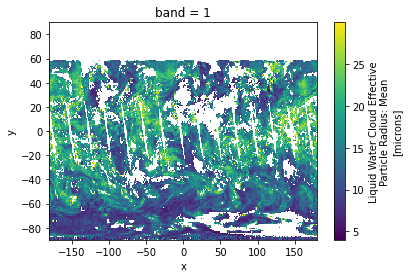

In [19]:
ds['Cloud_Effective_Radius_Liquid_Mean'].isel(band=0).plot()

In [56]:
ds

<xarray.Dataset>
Dimensions:                                              (band: 46, y: 180, x: 360)
Coordinates:
  * band                                                 (band) int64 1 2 ... 46
  * y                                                    (y) float64 89.5 ......
  * x                                                    (x) float64 -179.5 ....
Data variables: (12/29)
    Cloud_Water_Path_Liquid_Mean                         (band, y, x) float32 ...
    Cloud_Water_Path_Liquid_Mean_Uncertainty             (band, y, x) float32 ...
    Cloud_Water_Path_Liquid_Standard_Deviation           (band, y, x) float32 ...
    Cloud_Water_Path_Liquid_Maximum                      (band, y, x) float32 ...
    Cloud_Water_Path_Liquid_Minimum                      (band, y, x) float32 ...
    Cloud_Top_Temperature_Day_Maximum                    (band, y, x) float32 ...
    ...                                                   ...
    Cloud_Optical_Thickness_Combined_Maximum             (band, y, x) float32 ...
    Cloud_Optical_Thickness_Combined_Minimum             (band, y, x) float32 ...
    Cloud_Optical_Thickness_Combined_Standard_Deviation  (band, y, x) float32 ...
    Cloud_Effective_Radius_Liquid_Mean_Uncertainty       (band, y, x) float32 ...
    Cloud_Effective_Radius_Liquid_Mean                   (band, y, x) float32 ...
    spatial_ref                                          int64 0
Attributes: (12/29)
    ASSOCIATEDINSTRUMENTSHORTNAME.1:   MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:     Aqua
    ASSOCIATEDSENSORSHORTNAME.1:       MODIS
    DAYNIGHTFLAG:                      Both
    DESCRREVISION:                     6.1
    EASTBOUNDINGCOORDINATE:            180.0
    ...                                ...
    REPROCESSINGACTUAL:                processed once
    REPROCESSINGPLANNED:               further update is anticipated
    SHORTNAME:                         MYD08_D3
    SOUTHBOUNDINGCOORDINATE:           -90.0
    VERSIONID:                         61
    WESTBOUNDINGCOORDINATE:            -180.0

In [21]:
import matplotlib.pyplot as plt

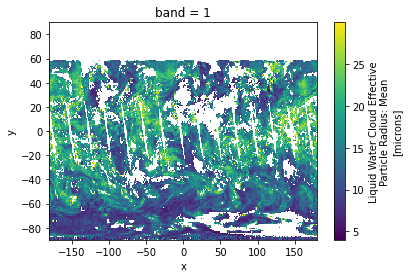

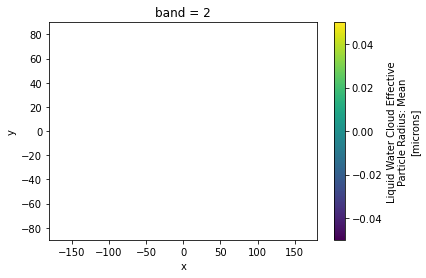

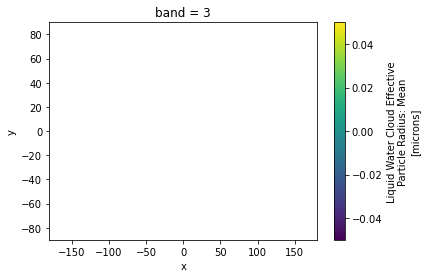

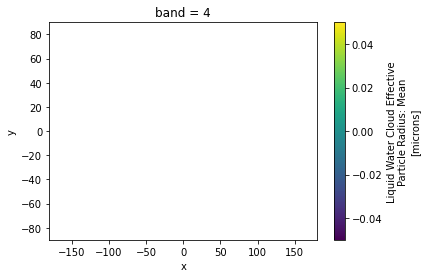

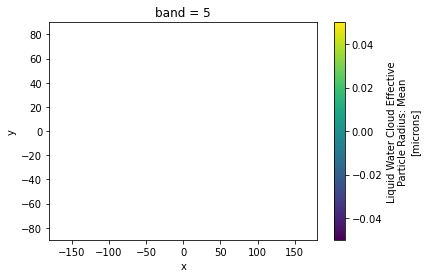

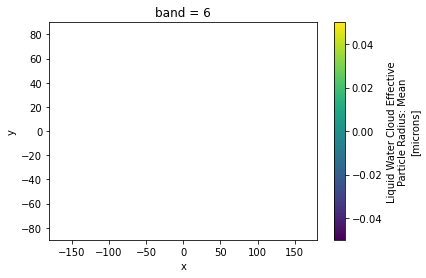

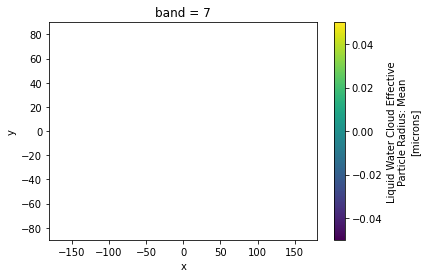

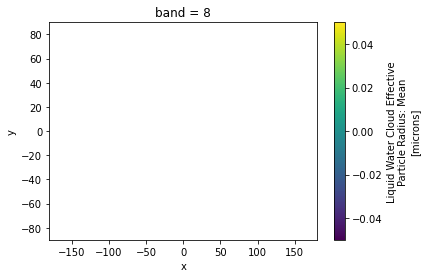

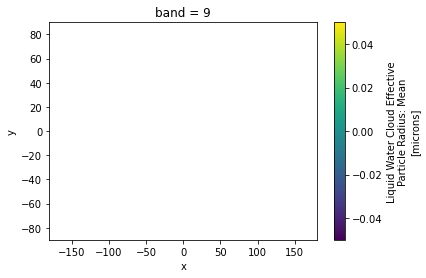

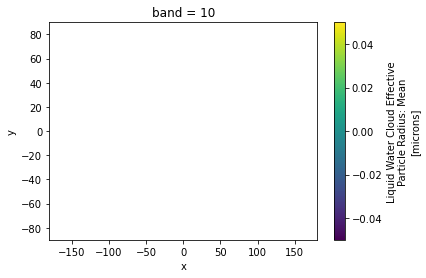

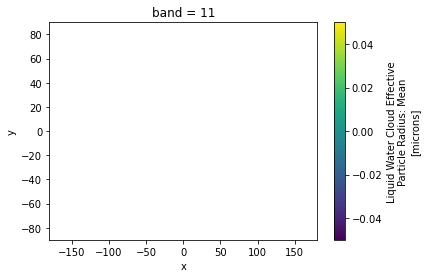

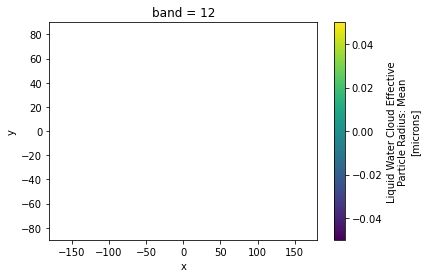

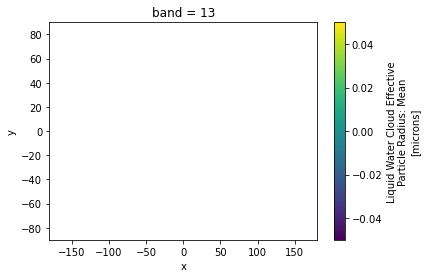

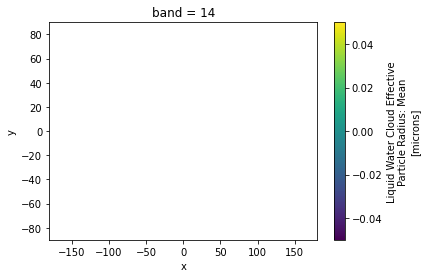

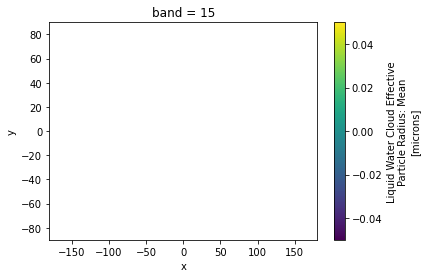

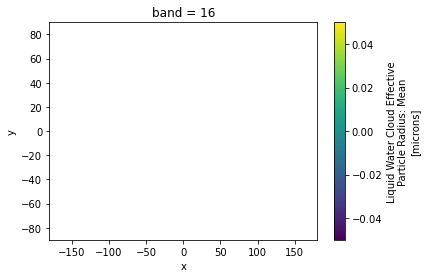

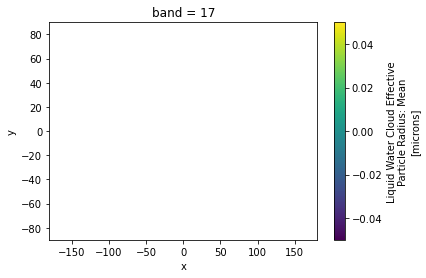

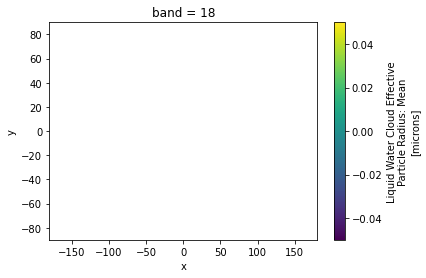

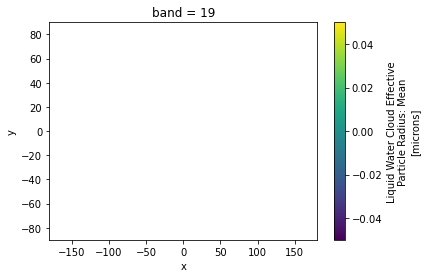

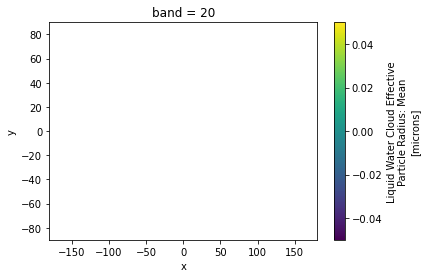

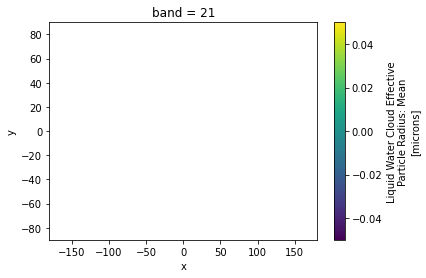

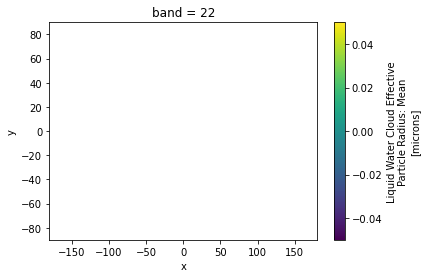

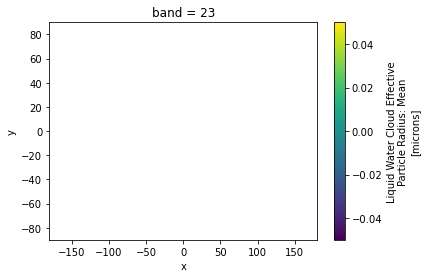

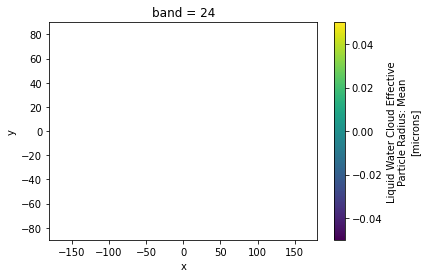

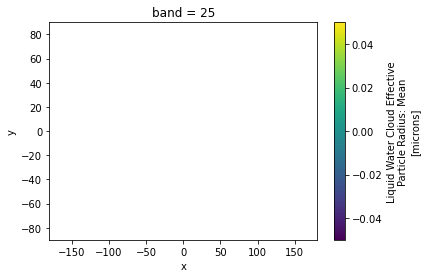

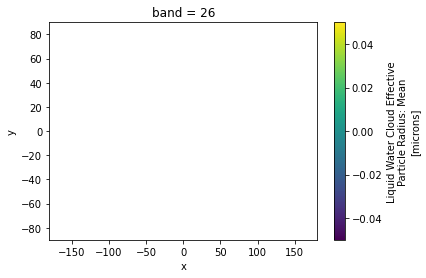

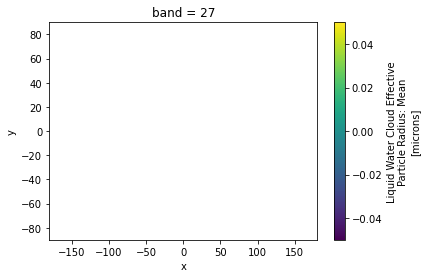

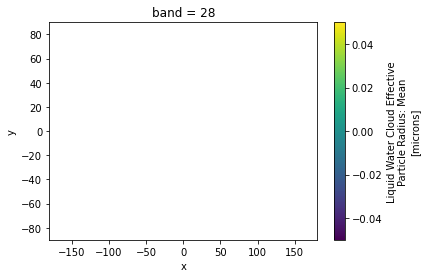

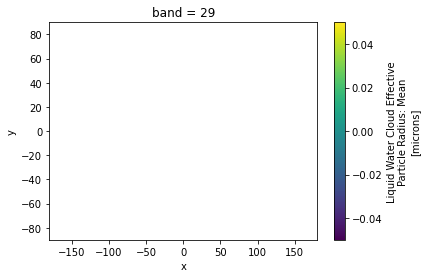

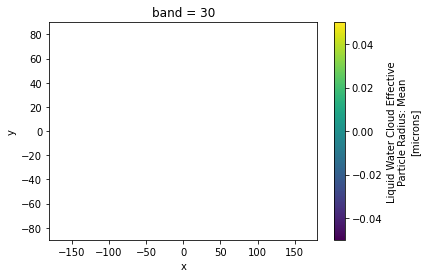

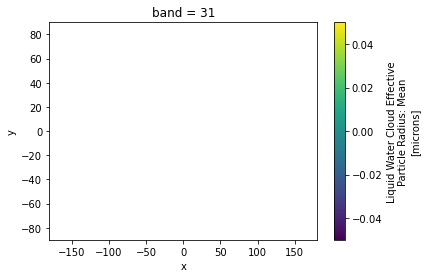

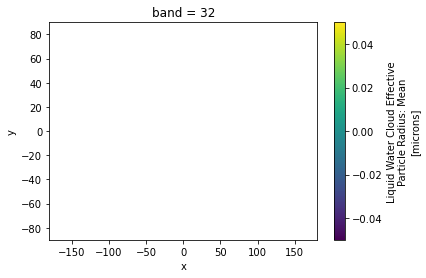

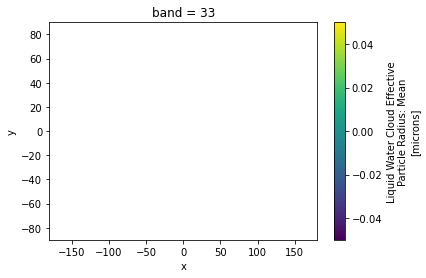

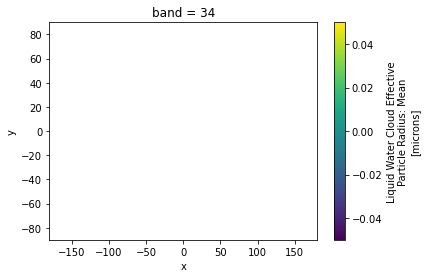

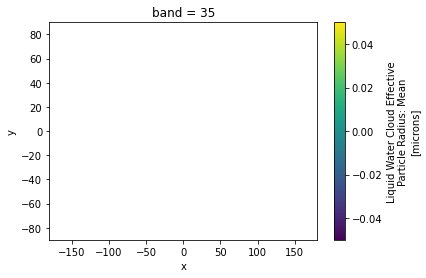

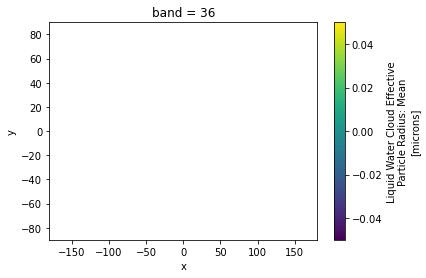

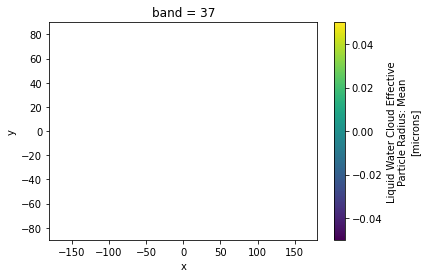

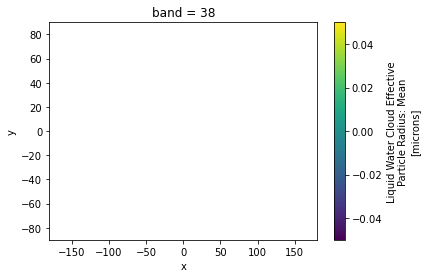

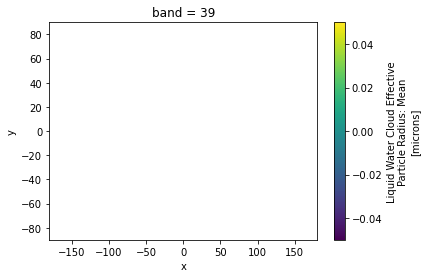

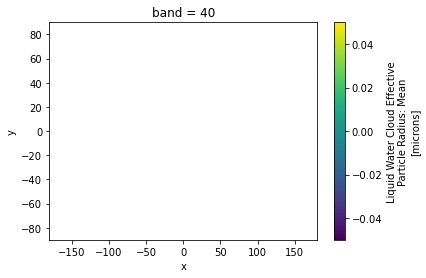

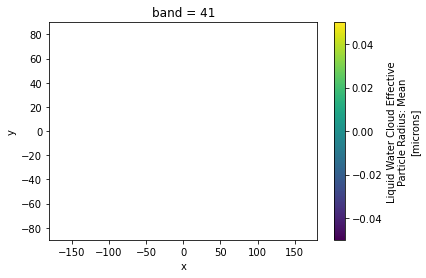

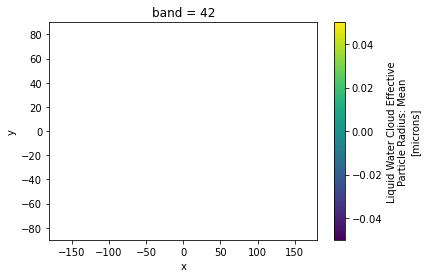

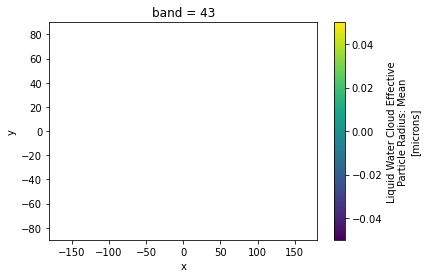

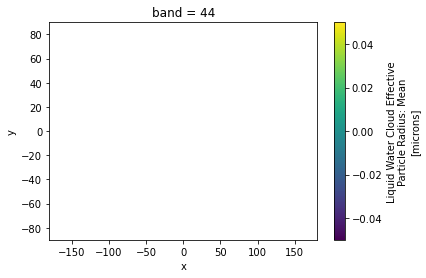

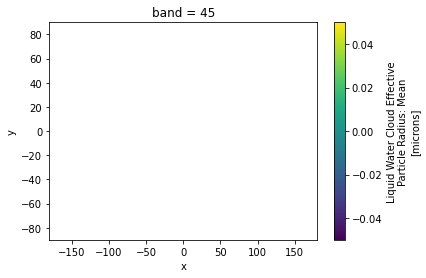

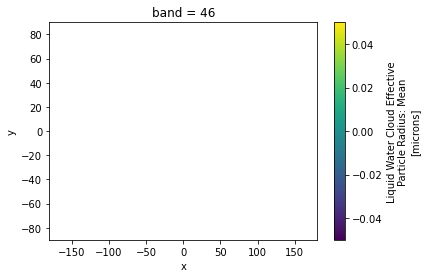

IndexError: index 46 is out of bounds for axis 0 with size 46

In [23]:
for i in range(50):
    ds['Cloud_Effective_Radius_Liquid_Mean'].isel(band=i).plot()
    plt.show()

In [22]:
ncf = netCDF4.Dataset(fs)

In [23]:
import h5py
h5py.run_tests()

Tests require pytest, pytest not installed


1

In [26]:
import h5netcdf



In [47]:
!ls -lah /proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/satellite/MODIS/MYD08_D3/MYD08_D3/2012/001/MYD08_D3.A2012001.061.201803701352*

-rw-rw-r-- 1 x_sarbl x_sarbl 176M Jun 10  2018 /proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/satellite/MODIS/MYD08_D3/MYD08_D3/2012/001/MYD08_D3.A2012001.061.2018037013520.hdf
-rw-rw-r-- 1 x_sarbl x_sarbl 160M Jul  5 13:29 /proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/satellite/MODIS/MYD08_D3/MYD08_D3/2012/001/MYD08_D3.A2012001.061.2018037013520_subset.nc


In [18]:
import xarray as xr
from osgeo import gdal
xr.set_options(display_style='html')
%matplotlib inline

ModuleNotFoundError: No module named 'osgeo'

In [19]:
nch = ncf.groups.get(fs)
xds = xr.open_dataset(xr.backends.NetCDF4DataStore(nch))


AttributeError: 'NoneType' object has no attribute 'acquire_context'

In [17]:
xr.open_dataset(fa)

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
http://xarray.pydata.org/en/stable/getting-started-guide/installing.html
http://xarray.pydata.org/en/stable/user-guide/io.html

In [28]:
file_mod = f

In [8]:
from pyhdf.SD import SD, SDC, SDAttr, HDF4Error
from pyhdf import HDF, VS, V
from pyhdf.HDF import *
from pyhdf.VS import *

In [13]:
for fi in [f1]:        
    try:
        file_mod = str(fi)
        f = HDF(file_mod) 
        vs = f.vstart() 
        R_eff_scale = vs.attach('Cloud_Effective_Radius_scale_factor')
        R_eff_offset = vs.attach('Cloud_Effective_Radius_add_offset')
        Tau_scale = vs.attach('Cloud_Optical_Thickness_scale_factor')
        Tau_offset = vs.attach('Cloud_Optical_Thickness_add_offset')
        r_eff_scale = np.array(R_eff_scale[:])
        r_eff_offset = np.array(R_eff_offset[:])
        tau_scale = np.array(Tau_scale[:])
        tau_offset = np.array(Tau_offset[:])
        R_eff_scale.detach()
        R_eff_offset.detach()
        Tau_scale.detach()
        Tau_offset.detach()
        vs.end() # terminate the vdata interface
        f.close()
    
        hdf_mod = SD(file_mod, SDC.READ)
        sds_obj = hdf_mod.select('Cloud_Effective_Radius') # select sds
        reff = sds_obj.get() # get sds data
            
        sds_obj = hdf_mod.select('Cloud_Optical_Thickness') # select sds
        tau = sds_obj.get() # get sds data
    
    except HDF4Error as msg:
        print("HDF4Error MOD06-1KM-AUX", msg)
        print("Skipping granule ...")
        continue

HDF4Error MOD06-1KM-AUX attach (106): Element is not in VSet tables
Skipping granule ...


In [19]:
data_vars_list =list(ds.data_vars)

In [20]:
data_vars_list

['Cloud_Water_Path_Liquid_Mean',
 'Cloud_Water_Path_Liquid_Mean_Uncertainty',
 'Cloud_Water_Path_Liquid_Standard_Deviation',
 'Cloud_Water_Path_Liquid_Maximum',
 'Cloud_Water_Path_Liquid_Minimum',
 'Cloud_Top_Temperature_Day_Maximum',
 'Cloud_Top_Temperature_Day_Mean',
 'Cloud_Top_Temperature_Day_Minimum',
 'Cloud_Top_Pressure_Day_Mean',
 'Cloud_Top_Pressure_Day_Maximum',
 'Cloud_Top_Pressure_Day_Minimum',
 'Cloud_Top_Height_Day_Mean',
 'Cloud_Top_Height_Day_Maximum',
 'Cloud_Top_Height_Day_Minimum',
 'Cloud_Fraction_Day_Mean',
 'Cloud_Fraction_Day_Maximum',
 'Cloud_Fraction_Day_Minimum',
 'Cloud_Optical_Thickness_Liquid_Maximum',
 'Cloud_Optical_Thickness_Liquid_Mean',
 'Cloud_Optical_Thickness_Liquid_Mean_Uncertainty',
 'Cloud_Optical_Thickness_Liquid_Minimum',
 'Cloud_Optical_Thickness_Liquid_Standard_Deviation',
 'Cloud_Optical_Thickness_Combined_Mean',
 'Cloud_Optical_Thickness_Combined_Maximum',
 'Cloud_Optical_Thickness_Combined_Minimum',
 'Cloud_Optical_Thickness_Combined_Stand

In [38]:
        file_mod = str(fi)
        f = HDF(file_mod) 
        vs = f.vstart() 


In [40]:
li = vs.vdatainfo()

In [46]:
len(li)

1058

In [49]:
li[0:]

[('YDim:mod08', 'DimVal0.1', 1955, 1, 1, 0, 4, 1962, 0),
 ('XDim:mod08', 'DimVal0.1', 1957, 1, 1, 0, 4, 1962, 0),
 ('Scattering_Angle_Histo_Intervals:mod08',
  'DimVal0.1',
  1959,
  1,
  1,
  0,
  4,
  1962,
  0),
 ('AOD_Histo_Intervals:mod08', 'DimVal0.1', 1961, 1, 1, 0, 4, 1962, 0),
 ('Corrected_Optical_Depth_Land_Micron_Levels:mod08',
  'DimVal0.1',
  1963,
  1,
  1,
  0,
  4,
  1962,
  0),
 ('Quality_Assurance_Categories:mod08',
  'DimVal0.1',
  1965,
  1,
  1,
  0,
  4,
  1962,
  0),
 ('Number_Pixels_Used_Land_Micron_Levels:mod08',
  'DimVal0.1',
  1967,
  1,
  1,
  0,
  4,
  1962,
  0),
 ('Number_Pixels_Used_Histo_Intervals:mod08',
  'DimVal0.1',
  1969,
  1,
  1,
  0,
  4,
  1962,
  0),
 ('Deep_Blue_Aerosol_Optical_Depth_Land_Micron_Levels:mod08',
  'DimVal0.1',
  1971,
  1,
  1,
  0,
  4,
  1962,
  0),
 ('Deep_Blue_Aerosol_Optical_Depth_Land_Histo_Intervals:mod08',
  'DimVal0.1',
  1973,
  1,
  1,
  0,
  4,
  1962,
  0),
 ('Deep_Blue_Angstrom_Exponent_Land_Histo_Intervals:mod0

In [53]:
np.array(vs.attach('AOD_Histo_Intervals:mod08')[:]) #.vdatainfo(0)

array([[17]])

In [66]:
f1

PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/satellite/MODIS/MYD08_D3/MYD08_D3/2012/001/MYD08_D3.A2012001.061.2018037013520.hdf')

In [65]:
vs.vdatainfo()

[('YDim:mod08', 'DimVal0.1', 1955, 1, 1, 0, 4, 1962, 0),
 ('XDim:mod08', 'DimVal0.1', 1957, 1, 1, 0, 4, 1962, 0),
 ('Scattering_Angle_Histo_Intervals:mod08',
  'DimVal0.1',
  1959,
  1,
  1,
  0,
  4,
  1962,
  0),
 ('AOD_Histo_Intervals:mod08', 'DimVal0.1', 1961, 1, 1, 0, 4, 1962, 0),
 ('Corrected_Optical_Depth_Land_Micron_Levels:mod08',
  'DimVal0.1',
  1963,
  1,
  1,
  0,
  4,
  1962,
  0),
 ('Quality_Assurance_Categories:mod08',
  'DimVal0.1',
  1965,
  1,
  1,
  0,
  4,
  1962,
  0),
 ('Number_Pixels_Used_Land_Micron_Levels:mod08',
  'DimVal0.1',
  1967,
  1,
  1,
  0,
  4,
  1962,
  0),
 ('Number_Pixels_Used_Histo_Intervals:mod08',
  'DimVal0.1',
  1969,
  1,
  1,
  0,
  4,
  1962,
  0),
 ('Deep_Blue_Aerosol_Optical_Depth_Land_Micron_Levels:mod08',
  'DimVal0.1',
  1971,
  1,
  1,
  0,
  4,
  1962,
  0),
 ('Deep_Blue_Aerosol_Optical_Depth_Land_Histo_Intervals:mod08',
  'DimVal0.1',
  1973,
  1,
  1,
  0,
  4,
  1962,
  0),
 ('Deep_Blue_Angstrom_Exponent_Land_Histo_Intervals:mod0

In [55]:
hdf_mod = SD(file_mod, SDC.READ)

#sds_obj = hdf_mod.select(vn)#'Cloud_Effective_Radius') # select sds
#            obj_get = sds_obj.get()

In [62]:
ob = hdf_mod.select('Cloud_Water_Path_Liquid_Mean')

In [63]:
ob.get()

array([[-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       ...,
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [   88,   284,    41, ...,    93,    18,    31],
       [   50,    49,    59, ...,    19,    49,    44]], dtype=int16)

In [23]:
fi = f1

In [24]:
        file_mod = str(fi)
        f = HDF(file_mod) 
        vs = f.vstart() 
        att_dic = []
        for vn in data_vars_list:
            print(vn)
            _att = vs.attach(vn)
            att_dic[vn] = _att
        #R_eff_scale = vs.attach('Cloud_Effective_Radius_scale_factor')
        #R_eff_offset = vs.attach('Cloud_Effective_Radius_add_offset')
        #Tau_scale = vs.attach('Cloud_Optical_Thickness_scale_factor')
        #Tau_offset = vs.attach('Cloud_Optical_Thickness_add_offset')
        arr_dic={}
        for vn in data_vars_list:
            att = att_dic[vn]
            arr_dic[vn] = np.array(att[:])
        for vn in data_vars_list:
            att = att_dic[vn]
            att.detach()
            
        #r_eff_scale = np.array(R_eff_scale[:])
        #r_eff_offset = np.array(R_eff_offset[:])
        #tau_scale = np.array(Tau_scale[:])
        #tau_offset = np.array(Tau_offset[:])
        #R_eff_scale.detach()
        #R_eff_offset.detach()
        #Tau_scale.detach()
        #Tau_offset.detach()
        vs.end() # terminate the vdata interface
        f.close()
    
        hdf_mod = SD(file_mod, SDC.READ)
        for vn in data_vars_list:
            
            sds_obj = hdf_mod.select(vn)#'Cloud_Effective_Radius') # select sds
            obj_get = sds_obj.get()
        #sds_obj = hdf_mod.select('Cloud_Effective_Radius') # select sds
        #reff = sds_obj.get() # get sds data
            
        #sds_obj = hdf_mod.select('Cloud_Optical_Thickness') # select sds
        #tau = sds_obj.get() # get sds data


Cloud_Water_Path_Liquid_Mean


HDF4Error: attach (106): Element is not in VSet tables

In [25]:
ds_new = xr.Dataset()

In [10]:
        file_mod = str(f1)


In [26]:
hdf_mod = SD(file_mod, SDC.READ)
for vn in data_vars_list:
        try: 
            sds_obj = hdf_mod.select(vn)#'Cloud_Effective_Radius') # select sds
            obj_get = sds_obj.get()
            ds_new[vn] = xr.DataArray(obj_get, dims=['lon','lat'])
        except:
            print(f'didnt find {vn}')

didnt find spatial_ref


In [88]:
for vn in ds_new.data_vars:
    ds_new[vn] = ds_new[vn].where( ds_new[vn]!=-9999)

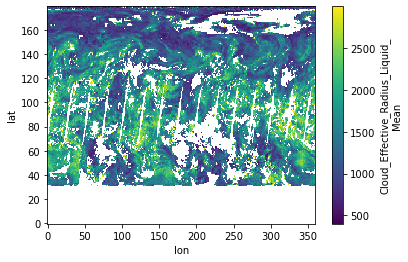

In [83]:
ds_new['Cloud_Effective_Radius_Liquid_Mean'].plot()

In [ ]:
ds['Cloud_Effective_Radius_Liquid_Mean'].isel(band=0).plot()

In [38]:
ds

<xarray.Dataset>
Dimensions:                                              (band: 46, y: 180, x: 360)
Coordinates:
  * band                                                 (band) int64 1 2 ... 46
  * y                                                    (y) float64 89.5 ......
  * x                                                    (x) float64 -179.5 ....
Data variables: (12/29)
    Cloud_Water_Path_Liquid_Mean                         (band, y, x) float32 ...
    Cloud_Water_Path_Liquid_Mean_Uncertainty             (band, y, x) float32 ...
    Cloud_Water_Path_Liquid_Standard_Deviation           (band, y, x) float32 ...
    Cloud_Water_Path_Liquid_Maximum                      (band, y, x) float32 ...
    Cloud_Water_Path_Liquid_Minimum                      (band, y, x) float32 ...
    Cloud_Top_Temperature_Day_Maximum                    (band, y, x) float32 ...
    ...                                                   ...
    Cloud_Optical_Thickness_Combined_Maximum             (band, y, x) float32 ...
    Cloud_Optical_Thickness_Combined_Minimum             (band, y, x) float32 ...
    Cloud_Optical_Thickness_Combined_Standard_Deviation  (band, y, x) float32 ...
    Cloud_Effective_Radius_Liquid_Mean_Uncertainty       (band, y, x) float32 ...
    Cloud_Effective_Radius_Liquid_Mean                   (band, y, x) float32 ...
    spatial_ref                                          int64 ...
Attributes: (12/29)
    ASSOCIATEDINSTRUMENTSHORTNAME.1:   MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:     Aqua
    ASSOCIATEDSENSORSHORTNAME.1:       MODIS
    DAYNIGHTFLAG:                      Both
    DESCRREVISION:                     6.1
    EASTBOUNDINGCOORDINATE:            180.0
    ...                                ...
    REPROCESSINGACTUAL:                processed once
    REPROCESSINGPLANNED:               further update is anticipated
    SHORTNAME:                         MYD08_D3
    SOUTHBOUNDINGCOORDINATE:           -90.0
    VERSIONID:                         61
    WESTBOUNDINGCOORDINATE:            -180.0

In [42]:
file_name = str(f1)

In [43]:
file = SD(file_name, SDC.READ)

print(file.info())

(975, 11)


In [45]:
datasets_dic = file.datasets()

for idx,sds in enumerate(datasets_dic.keys()):
    print(idx,sds)

0 Solar_Zenith_Mean
1 Solar_Zenith_Standard_Deviation
2 Solar_Zenith_Minimum
3 Solar_Zenith_Maximum
4 Solar_Zenith_Pixel_Counts
5 Solar_Azimuth_Mean
6 Solar_Azimuth_Standard_Deviation
7 Solar_Azimuth_Minimum
8 Solar_Azimuth_Maximum
9 Solar_Azimuth_Pixel_Counts
10 Sensor_Zenith_Mean
11 Sensor_Zenith_Standard_Deviation
12 Sensor_Zenith_Minimum
13 Sensor_Zenith_Maximum
14 Sensor_Zenith_Pixel_Counts
15 Sensor_Azimuth_Mean
16 Sensor_Azimuth_Standard_Deviation
17 Sensor_Azimuth_Minimum
18 Sensor_Azimuth_Maximum
19 Sensor_Azimuth_Pixel_Counts
20 Aerosol_Scattering_Angle_Mean
21 Aerosol_Scattering_Angle_Standard_Deviation
22 Aerosol_Scattering_Angle_Minimum
23 Aerosol_Scattering_Angle_Maximum
24 Aerosol_Scattering_Angle_Pixel_Counts
25 Aerosol_Scattering_Angle_Histogram_Counts
26 Aerosol_Avg_Cloud_Distance_Land_Ocean_Mean
27 Aerosol_Avg_Cloud_Distance_Land_Ocean_Standard_Deviation
28 Aerosol_Avg_Cloud_Distance_Land_Ocean_Minimum
29 Aerosol_Avg_Cloud_Distance_Land_Ocean_Maximum
30 Aerosol_Avg_C

In [64]:
def extract_var(file, vn):
    sds_obj = file.select(vn)
    atts = sds_obj.attributes()
    dims = sds_obj.dimensions()
    dt = sds_obj.get()
    da = xr.DataArray(dt, dims=dims, attrs=atts)
    return da

In [55]:
print(sds_obj.attributes())

{}


In [58]:
sds_obj.dimensions()

{'XDim:mod08': 360}

In [72]:
ds_n = xr.Dataset()
for vn in data_vars_list:
    try:
        da = extract_var(file,vn)
        ds_n[vn] = da
    except HDF4Error:
        print(f'Couldnt find {vn}, skipping')
        
x = extract_var(file, 'XDim')
y = extract_var(file, 'YDim')

ds_n




Couldnt find spatial_ref, skipping


<xarray.Dataset>
Dimensions:                                              (YDim:mod08: 180, XDim:mod08: 360)
Dimensions without coordinates: YDim:mod08, XDim:mod08
Data variables: (12/28)
    Cloud_Water_Path_Liquid_Mean                         (YDim:mod08, XDim:mod08) int16 ...
    Cloud_Water_Path_Liquid_Mean_Uncertainty             (YDim:mod08, XDim:mod08) int16 ...
    Cloud_Water_Path_Liquid_Standard_Deviation           (YDim:mod08, XDim:mod08) int16 ...
    Cloud_Water_Path_Liquid_Maximum                      (YDim:mod08, XDim:mod08) int16 ...
    Cloud_Water_Path_Liquid_Minimum                      (YDim:mod08, XDim:mod08) int16 ...
    Cloud_Top_Temperature_Day_Maximum                    (YDim:mod08, XDim:mod08) int16 ...
    ...                                                   ...
    Cloud_Optical_Thickness_Combined_Mean                (YDim:mod08, XDim:mod08) int16 ...
    Cloud_Optical_Thickness_Combined_Maximum             (YDim:mod08, XDim:mod08) int16 ...
    Cloud_Optical_Thickness_Combined_Minimum             (YDim:mod08, XDim:mod08) int16 ...
    Cloud_Optical_Thickness_Combined_Standard_Deviation  (YDim:mod08, XDim:mod08) int16 ...
    Cloud_Effective_Radius_Liquid_Mean_Uncertainty       (YDim:mod08, XDim:mod08) int16 ...
    Cloud_Effective_Radius_Liquid_Mean                   (YDim:mod08, XDim:mod08) int16 ...

In [71]:

ds_n['x'

<xarray.Dataset>
Dimensions:                                              (YDim:mod08: 180, XDim:mod08: 360)
Dimensions without coordinates: YDim:mod08, XDim:mod08
Data variables: (12/28)
    Cloud_Water_Path_Liquid_Mean                         (YDim:mod08, XDim:mod08) int16 ...
    Cloud_Water_Path_Liquid_Mean_Uncertainty             (YDim:mod08, XDim:mod08) int16 ...
    Cloud_Water_Path_Liquid_Standard_Deviation           (YDim:mod08, XDim:mod08) int16 ...
    Cloud_Water_Path_Liquid_Maximum                      (YDim:mod08, XDim:mod08) int16 ...
    Cloud_Water_Path_Liquid_Minimum                      (YDim:mod08, XDim:mod08) int16 ...
    Cloud_Top_Temperature_Day_Maximum                    (YDim:mod08, XDim:mod08) int16 ...
    ...                                                   ...
    Cloud_Optical_Thickness_Combined_Mean                (YDim:mod08, XDim:mod08) int16 ...
    Cloud_Optical_Thickness_Combined_Maximum             (YDim:mod08, XDim:mod08) int16 ...
    Cloud_Optical_Thickness_Combined_Minimum             (YDim:mod08, XDim:mod08) int16 ...
    Cloud_Optical_Thickness_Combined_Standard_Deviation  (YDim:mod08, XDim:mod08) int16 ...
    Cloud_Effective_Radius_Liquid_Mean_Uncertainty       (YDim:mod08, XDim:mod08) int16 ...
    Cloud_Effective_Radius_Liquid_Mean                   (YDim:mod08, XDim:mod08) int16 ...

In [47]:
ds_n = xr.Dataset()
ds_n.ass